<h1>MENSAJES TÓXICOS EN YOU TUBE</h1>

<h6>Este cuaderno es un ejemplo de análisis exploratorio de datos (EDA por sus siglas en inglés) ejecutado sobre el dataset YOUTOXIC_ENGLISH_1000-CSV donde se recogen datos de mensajes de la plataforma de youtube.

El ejercicio consiste en detectar mensajes tóxicos en la plataforma de videos YouTube, buscando patrones relevantes que pudiesen ser útiles en la predicción de dichos mensajes.



<h2>Estas son las variables por entrada que contiene este dataset:</h2>
<ul>
    <li><b>CommentId: </b>Comentario Id</li>
    <li><b>VideoId: </b>Video Id</li>
    <li><b>Text: </b>Texto</li>
    <li><b>isToxic: </b>Es tóxico</li>
    <li><b>IsThreat: </b>Es una amenaza</li>
    <li><b>IsProvocative: </b>Es provocativo</li>
    <li><b>IsObscene: </b>Es obsceno</li>
    <li><b>IsHatespeech: </b>Es discurso de odio</li>
    <li><b>IsRacist: </b>Es racista</li>
    <li><b>IsNationalist: </b>Es nacionalista</li>
    <li><b>IsSexist: </b>Es sexista</li>
    <li><b>IsHomophobic: </b>Es homófobo</li>
    <li><b>IsReligiousHate: </b>Es de odio religioso</li>
    <li><b>IsRadicalism: </b>Es radical</li>
</ul>

In [1]:
# Importar librerías básicas análisis de datos
import pandas as pd
import numpy as np
import re, string
import emoji

#Librerias NLP
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías entrenamiento de modelos
from sklearn.model_selection import train_test_split

In [5]:
#!pip install emoji

In [7]:
#!pip install spacy
#!pip install nltk
#!python -m spacy download en_core_web_sm # --> pipeline en ingles
#!pip install scikit-learn

# Exploración inicial del dataset

In [21]:
df = pd.read_csv('youtoxic_english_1000.csv')
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# formato de los datos
df.dtypes

CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [7]:
# Conocer datos nulos
df.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [8]:
# Datos estadísticos
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [9]:
# Descripción de columnas
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.corr()

/tmp/ipykernel_27652/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
IsToxic,1.000000,0.797086,0.158048,0.472718,0.359707,0.431774,0.407869,0.096908,0.034142,NaN,0.118928,NaN
IsAbusive,0.797086,1.000000,0.198282,0.593057,0.451277,-0.119603,-0.121005,-0.042843,0.042833,NaN,-0.042970,NaN
IsThreat,0.158048,0.198282,1.000000,0.106626,-0.048820,0.002063,-0.034268,-0.013152,-0.004634,NaN,0.111962,NaN
IsProvocative,0.472718,0.593057,0.106626,1.000000,0.089788,-0.072719,-0.075072,-0.008796,-0.013860,NaN,0.001699,NaN
IsObscene,0.359707,0.451277,-0.048820,0.089788,1.000000,-0.027061,-0.035277,-0.029934,0.094916,NaN,-0.036736,NaN
IsHatespeech,0.431774,-0.119603,0.002063,-0.072719,-0.027061,1.000000,0.944637,0.224442,0.079074,NaN,0.275440,NaN
IsRacist,0.407869,-0.121005,-0.034268,-0.075072,-0.035277,0.944637,1.000000,0.237595,-0.011958,NaN,0.013885,NaN
IsNationalist,0.096908,-0.042843,-0.013152,-0.008796,-0.029934,0.224442,0.237595,1.000000,-0.002841,NaN,-0.009897,NaN
IsSexist,0.034142,0.042833,-0.004634,-0.013860,0.094916,0.079074,-0.011958,-0.002841,1.000000,NaN,-0.003487,NaN
IsHomophobic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualización de Datos

In [41]:
# Establecer el porcentaje de una columna de datos de visualización
def porcentaje_grafico(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")

Categpría del comentario:

IsToxic
False    538
True     462
Name: IsToxic, dtype: int64

IsAbusive
False    647
True     353
Name: IsAbusive, dtype: int64

IsThreat
False    979
True      21
Name: IsThreat, dtype: int64

IsProvocative
False    839
True     161
Name: IsProvocative, dtype: int64

IsObscene
False    900
True     100
Name: IsObscene, dtype: int64

IsHatespeech
False    862
True     138
Name: IsHatespeech, dtype: int64

IsRacist
False    875
True     125
Name: IsRacist, dtype: int64

IsNationalist
False    992
True       8
Name: IsNationalist, dtype: int64

IsSexist
False    999
True       1
Name: IsSexist, dtype: int64

IsHomophobic
False    1000
Name: IsHomophobic, dtype: int64

IsReligiousHate
False    988
True      12
Name: IsReligiousHate, dtype: int64

IsRadicalism
False    1000
Name: IsRadicalism, dtype: int64



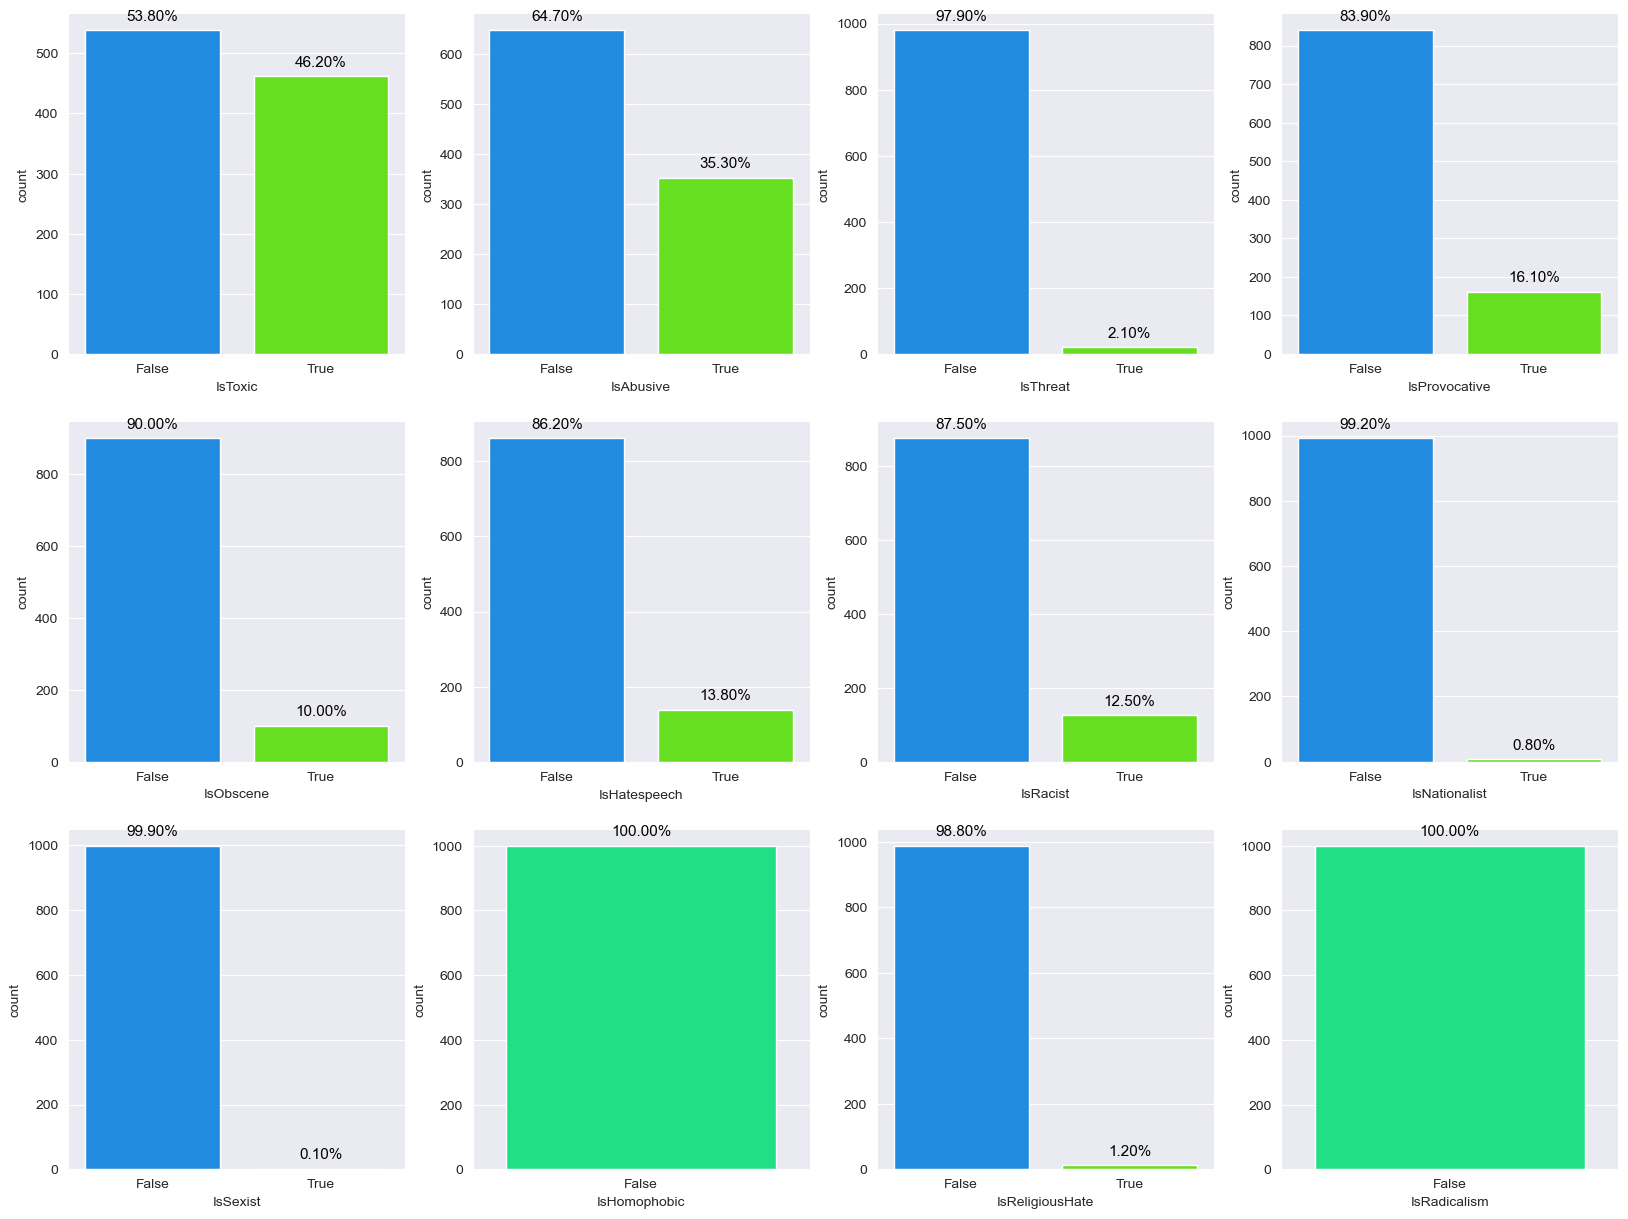

In [42]:
variables_binarias=["IsToxic",'IsAbusive',"IsThreat",  "IsProvocative" , "IsObscene", "IsHatespeech", "IsRacist", "IsNationalist", "IsSexist", "IsHomophobic", "IsReligiousHate", "IsRadicalism" ]
# Conteo de cada una de las categorías.
print(f"Categpría del comentario:")
print()
for col in variables_binarias:
    print(f"{col}")
    print(df[col].value_counts())
    print()

fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(20,15))
for i,item in enumerate(variables_binarias): #enumerate()
    plt.subplot(3,4,(i+1))
    ax = sns.countplot(x=item,data=df,palette="gist_rainbow_r")
    plt.xlabel(str(item))
    #plt.title("Categorias de Toxicidad "+str(item))
    i=i+1
    porcentaje_grafico(ax)
plt.show()

* # Número de comentarios por Id del video

In [3]:
df.Text.value_counts()
#como detectar el id de esos repetidos

run them over                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [31]:
df.VideoId.value_counts()

9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
dDbRyFIkNII     10
XRuCW80L9mA     10
5vF4si3hoRA      8
Name: VideoId, dtype: int64

In [ ]:
#Resetear el id de Video para que sea mas legible en el grafico

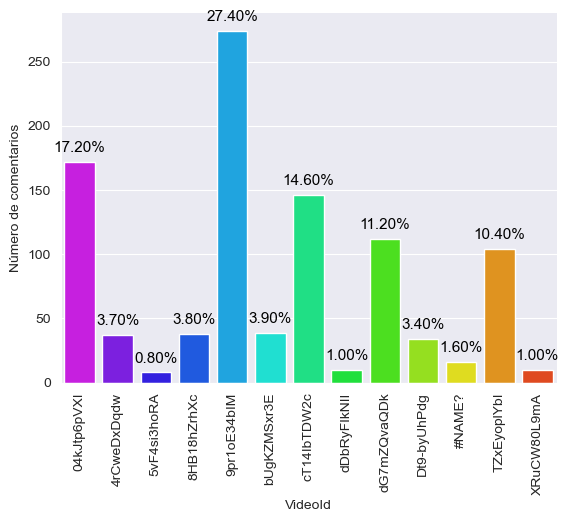

In [32]:
ax = sns.countplot(x="VideoId",data=df, palette="gist_rainbow_r")
plt.ylabel("Número de comentarios")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
    plt.xticks(rotation=90)
plt.show()

In [3]:
# Calcular la columna toxico en base a las columnas booleanas
def crear_columna_Toxico(df):
    df_Toxico = []
    """Se crea la columna Toxico, con la condición --> Si alguna de las categorias existentes tiene al menos un True ,
    entonces el valor de la columna Toxico es True ó 1"""
    for row in range(len(df)):
        if df.iloc[row]["IsToxic"] == True or df.iloc[row]["IsAbusive"] == True or df.iloc[row]["IsThreat"] == True or df.iloc[row]["IsProvocative"] == True   or df.iloc[row]["IsObscene"] == True or df.iloc[row]["IsHatespeech"]  == True or df.iloc[row]["IsRacist"] == True    or df.iloc[row]["IsNationalist"] == True or  df.iloc[row]["IsReligiousHate"] == True  or  df.iloc[row]["IsSexist"] == True:
            df_Toxico.append(1)
        else:
            df_Toxico.append(0)
    df["Toxico"] = df_Toxico
    df = df.drop(['IsToxic', 'IsAbusive', 'IsThreat','IsProvocative', 'IsHatespeech', 'IsObscene','IsRacist', 'IsNationalist', 'IsReligiousHate','IsSexist', "CommentId","VideoId",'IsHomophobic', 'IsRadicalism'], axis=1)
    return df

In [22]:
# Se aplica el metodo de crear la Columna Toxico, y se eliminan las otras categorías.
df =crear_columna_Toxico(df)
df.head(5)

,Text,Toxico
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,1
2,\nDont you reckon them 'black lives matter' ba...,1
3,There are a very large number of people who do...,0
4,"The Arab dude is absolutely right, he should h...",0


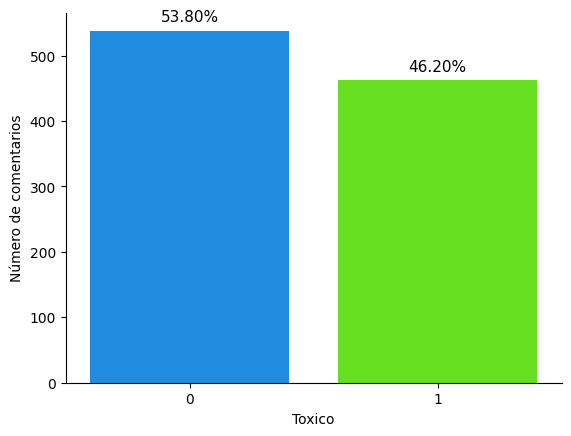

In [46]:
#Visualización de balanceo de datos.
ax = sns.countplot(x="Toxico",data=df, palette="gist_rainbow_r")
plt.ylabel("Número de comentarios")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

## Procesamiento del texto con NLP (Procesamiento del lenguaje Natural)

In [23]:
#df = pd.read_csv('youtoxic_english_1000.csv')
#df =crear_columna_Toxico(df)
#df

In [6]:
def minusculas(text):
    text_limpio = text.lower()
    return text_limpio

In [7]:
## Eliminar tildes y caracteres especiales
def caracteres(text):
    '''Remove punctuation and remove words containing numbers.'''

    text = re.sub('.*?¿', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    re.sub('[0-9]+', '', text)
    return text

In [8]:
def  abreviaturas(text):
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub("(\W)"," ",text)
    text = re.sub('S*dS*s*','', text)
    return text

In [9]:
def eliminar_emoji(text):
    return emoji.replace_emoji(text, replace='')

In [10]:
def limpieza_texto(text):
    df['Text'] = df['Text'].apply(minusculas)
    df['Text'] = df['Text'].apply(caracteres)
    #df['Text'] = df['Text'].apply(puntuacion)
    df['Text'] = df['Text'].apply(abreviaturas)
    df['Text'] = df['Text'].apply(eliminar_emoji)
    #df['Text'] = df['Text'].apply(espacios_blancos)
    return df

### Vamos a aplicar los dos métodos anteriores:
* Convertir comentarios a minúsculas
* Eliminar caracteres especiales y signos de puntuación.

In [24]:
df = limpieza_texto(df)
df

,Text,Toxico
0,if only people woul just take a step back an n...,0
1,law enfocement is not taine to shoot to appehe...,1
2,ont you eckon them black lives matte bannes be...,1
3,thee ae a vey lage numbe of people who o not l...,0
4,the aab ue is absolutely ight he shoul have no...,0
...,...,...
995,i emembe that they sent in the national efence...,0
996,stats ont epesent the poblem ace baiting an at...,1
997,the quote fom the mothe wow that hit ha vey ac...,0
998,this vieo is so acist,0


# Tokenizar

In [25]:
nlp = spacy.load("en_core_web_sm")
df["tokens"] = df["Text"].apply(lambda x: nlp.tokenizer(x))
df

,Text,Toxico,tokens
0,if only people woul just take a step back an n...,0,"(if, only, people, woul, just, take, a, step, ..."
1,law enfocement is not taine to shoot to appehe...,1,"(law, enfocement, is, not, taine, to, shoot, t..."
2,ont you eckon them black lives matte bannes be...,1,"(ont, you, eckon, them, black, lives, matte, b..."
3,thee ae a vey lage numbe of people who o not l...,0,"(thee, ae, a, vey, lage, numbe, of, people, wh..."
4,the aab ue is absolutely ight he shoul have no...,0,"(the, aab, ue, is, absolutely, ight, he, shoul..."
...,...,...,...
995,i emembe that they sent in the national efence...,0,"(i, emembe, that, they, sent, in, the, nationa..."
996,stats ont epesent the poblem ace baiting an at...,1,"(stats, ont, epesent, the, poblem, ace, baitin..."
997,the quote fom the mothe wow that hit ha vey ac...,0,"(the, quote, fom, the, mothe, wow, that, hit, ..."
998,this vieo is so acist,0,"(this, vieo, is, so, acist)"


# Stop Words

In [29]:
def eliminar_stop_words(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return " ".join(token for token in tokens)

# Lematizacion

In [30]:
def lematizar(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return " ".join(token for token in tokens)


### Vamos a aplicar los dos métodos anteriores:
* Eliminar las "palabras vacías" o "stop words"
* Lematizar.

In [31]:
def sw_lem(text):
    df['tokens'] = df['tokens'].apply(eliminar_stop_words)
    df['tokens'] = df['tokens'].apply(lematizar)
    return df

In [32]:
df = sw_lem(df)
df

,Text,Toxico,tokens
0,if only people woul just take a step back an n...,0,people woul step case not people situation ...
1,law enfocement is not taine to shoot to appehe...,1,law enfocement taine shoot appehen ae taine...
2,ont you eckon them black lives matte bannes be...,1,ont eckon black life matte bannes hel white cu...
3,thee ae a vey lage numbe of people who o not l...,0,thee ae vey lage numbe people o like police of...
4,the aab ue is absolutely ight he shoul have no...,0,aab ue absolutely ight shoul shoot exta tim...
...,...,...,...
995,i emembe that they sent in the national efence...,0,emembe send national efence thee
996,stats ont epesent the poblem ace baiting an at...,1,stats ont epesent poblem ace bait attitue s oe...
997,the quote fom the mothe wow that hit ha vey ac...,0,quote fom mothe wow hit ha vey accuate
998,this vieo is so acist,0,vieo acist


In [ ]:
#PENDIENTES
#Quitar urls de los comentarios
#Convertir números en texto
#Quitar barras invertidas
#Quitar espacios en blanco
#Revisar abreviaturas para que se eliminen efectivamente como stops worlds
# Eliminar emojis

# Modelos de Machine Learning

# Vectorizar X antes de hacer el split en train y test
Utilizaremos `TfidfVectorizer` para crear vectores de los datos textuales.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'w{1,}',
    ngram_range=(1, 3),
    stop_words='english',
    sublinear_tf=True)

In [34]:
vect

TfidfVectorizer(ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='w{1,}')

# Separar dataset para el entrenamiento

In [35]:
X= df['tokens']
y= df['Toxico']

In [77]:
#Convertir X en un array disperso de Numpy
#X = vect.fit_transform(X).toarray()

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=101, stratify=y)

# Se aplica la función vectorizar a los datasets de train y test

In [37]:
X_train = vect.fit_transform(X_train).toarray()
X_test = vect.transform(X_test).toarray()

/home/alexandra/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['w'] not in stop_words.
  warnings.warn(


# Algoritmos de ML clasificacion (no-ensemble)
### * Naïve Bayes
### * Máquinas de vectores de soporte
### * Regresión logística
### * Árboles de decisión
### * Vecinos más cercanos


In [38]:
#Arbol de decision
from sklearn.tree import DecisionTreeClassifier
#Regresión logística
from sklearn.linear_model import LogisticRegression
#KML
from sklearn.neighbors import KNeighborsClassifier
#SVR
from sklearn.svm import SVC
#NAive Bayes
from sklearn.naive_bayes import GaussianNB

In [39]:
## Métricas de evaluación

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [40]:
def train_evaluate(nombre_modelo,modelo):
    #Instanciación del modelo
    mod= modelo()
    # Entrenamiento del modelo
    mod.fit(X_train, y_train)

    #Prediccion y evaluación del modelo
    y_predict= mod.predict(X_test)
    y_predict_train= mod.predict(X_train)

    #Métricas de Evaluación
    accuracy= accuracy_score(y_test, y_predict)
    accuracy_train= accuracy_score(y_train, y_predict_train)
    recall= recall_score(y_test, y_predict)
    f1= f1_score(y_test, y_predict)
    ROC= roc_auc_score(y_test, y_predict)
    print(nombre_modelo)
    print("-----------------------------------------------------")
    print("F1_score: {:.2f} %".format(100 * f1))
    print("-----------------------------------------------------")
    print("Recall: {:.2f} %".format(100 * recall))
    print("-----------------------------------------------------")
    print("ROC: {:.2f} %".format(100 * ROC))
    print("-----------------------------------------------------")
    print("Accuracy_test es: {:.2f} %".format(100 * accuracy))
    print("-----------------------------------------------------")
    print("Accuracy_train es: {:.2f} %".format(100 * accuracy_train))
    print("-----------------------------------------------------")
    print("Overfitting {:.2f} % ".format(((accuracy - accuracy_train)/accuracy) *100))
    print("-----------------------------------------------------")
    print("Matriz de confusión:")
    #print("-----------------------------------------------------")

    Labels= 'Sin Odio', 'Con Odio'
    conf_matrix = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
    #plt.title("Matriz de confusión")
    plt.ylabel('True class')
    plt.xlabel('Predicted Class')
    plt.show()
    print("-----------------------------------------------------")
    print("Reporte de Clasificación (test)")
    print("-----------------------------------------------------")
    print (classification_report(y_test, y_predict))

    #train_evaluate(y_test, y_predict)
    print("-----------------------------------------------------")
    print("Reporte de Clasificación (train)")
    print("-----------------------------------------------------")
    print (classification_report(y_train,y_predict_train))
    print("-----------------------------------------------------")

In [211]:
#train_evaluate("Logistic Regression", LogisticRegression)
#train_evaluate("SVM", SVC)
#train_evaluate("Decission Tree", DecisionTreeClassifier)
#train_evaluate("Naive Bayes", GaussianNB)
#train_evaluate("KNN", KNeighborsClassifier)


Logistic Regression
-----------------------------------------------------
F1_score: 0.00 %
-----------------------------------------------------
Recall: 0.00 %
-----------------------------------------------------
ROC: 50.00 %
-----------------------------------------------------
Accuracy_test es: 54.00 %
-----------------------------------------------------
Accuracy_train es: 53.75 %
-----------------------------------------------------
Overfitting 0.46 % 
-----------------------------------------------------
Matriz de confusión:


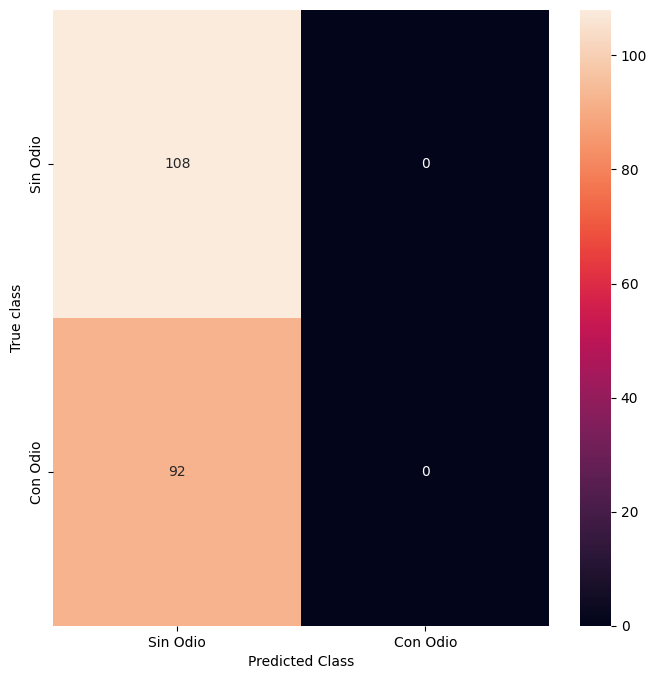

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       430
           1       0.00      0.00      0.00       370

    accuracy                           0.54       800
   macro avg       0.27      0.50      0.35       800
weighted avg       0.29      0.54      0.38       800

-----------------------------------------------------


/home/alexandra/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandra/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandra/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandra/.local/lib/p

In [41]:
train_evaluate("Logistic Regression", LogisticRegression)

Naive Bayes
-----------------------------------------------------
F1_score: 63.01 %
-----------------------------------------------------
Recall: 100.00 %
-----------------------------------------------------
ROC: 50.00 %
-----------------------------------------------------
Accuracy_test es: 46.00 %
-----------------------------------------------------
Accuracy_train es: 46.50 %
-----------------------------------------------------
Overfitting -1.09 % 
-----------------------------------------------------
Matriz de confusión:


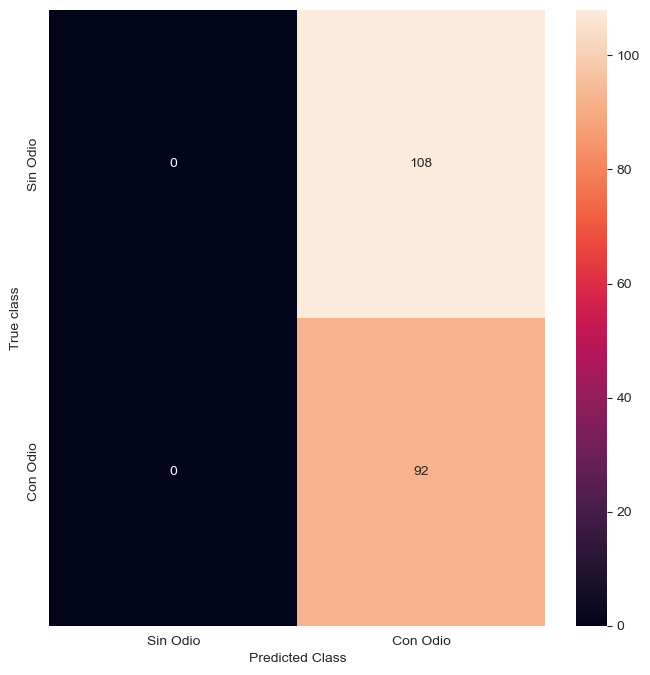

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.23      0.50      0.32       200
weighted avg       0.21      0.46      0.29       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       430
           1       0.46      1.00      0.63       370

    accuracy                           0.47       800
   macro avg       0.73      0.50      0.32       800
weighted avg       0.75      0.47      0.30       800

-----------------------------------------------------


/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [56]:
train_evaluate("Naive Bayes", GaussianNB)

Naive Bayes
-----------------------------------------------------
F1_score: 0.00 %
-----------------------------------------------------
Recall: 0.00 %
-----------------------------------------------------
ROC: 50.00 %
-----------------------------------------------------
Accuracy_test es: 54.00 %
-----------------------------------------------------
Accuracy_train es: 53.75 %
-----------------------------------------------------
Overfitting 0.46 % 
-----------------------------------------------------
Matriz de confusión:


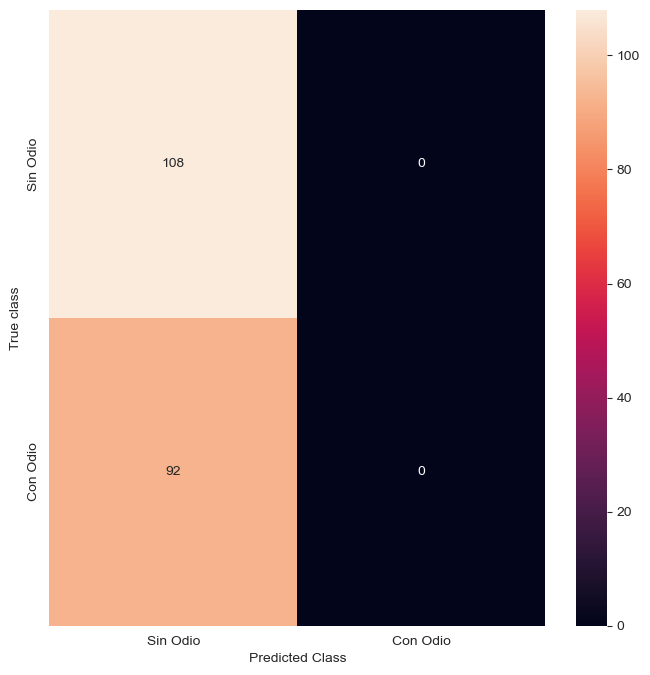

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       430
           1       0.00      0.00      0.00       370

    accuracy                           0.54       800
   macro avg       0.27      0.50      0.35       800
weighted avg       0.29      0.54      0.38       800

-----------------------------------------------------


/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [57]:
from sklearn.naive_bayes import MultinomialNB
train_evaluate("Naive Bayes", MultinomialNB)

Decission Tree
-----------------------------------------------------
F1_score: 2.06 %
-----------------------------------------------------
Recall: 1.09 %
-----------------------------------------------------
ROC: 48.69 %
-----------------------------------------------------
Accuracy_test es: 52.50 %
-----------------------------------------------------
Accuracy_train es: 54.50 %
-----------------------------------------------------
Overfitting -3.81 % 
-----------------------------------------------------
Matriz de confusión:


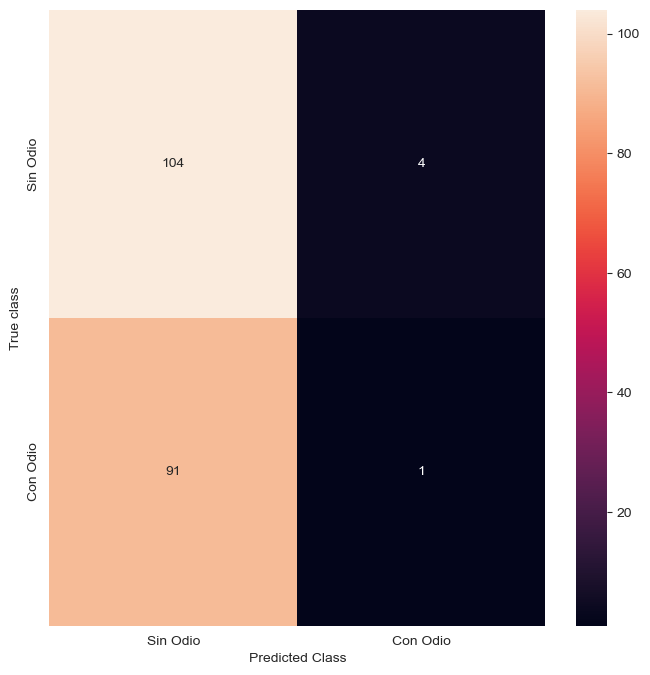

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.96      0.69       108
           1       0.20      0.01      0.02        92

    accuracy                           0.53       200
   macro avg       0.37      0.49      0.35       200
weighted avg       0.38      0.53      0.38       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.99      0.70       430
           1       0.71      0.03      0.05       370

    accuracy                           0.55       800
   macro avg       0.63      0.51      0.38       800
weighted avg       0.62      0.55      0.40       800

-----------------------------------------------------


In [58]:
train_evaluate("Decission Tree", DecisionTreeClassifier)

/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

KNN
-----------------------------------------------------
F1_score: 47.44 %
-----------------------------------------------------
Recall: 55.43 %
-----------------------------------------------------
ROC: 44.38 %
-----------------------------------------------------
Accuracy_test es: 43.50 %
-----------------------------------------------------
Accuracy_train es: 48.12 %
-----------------------------------------------------
Overfitting -10.63 % 
-----------------------------------------------------
Matriz de confusión:


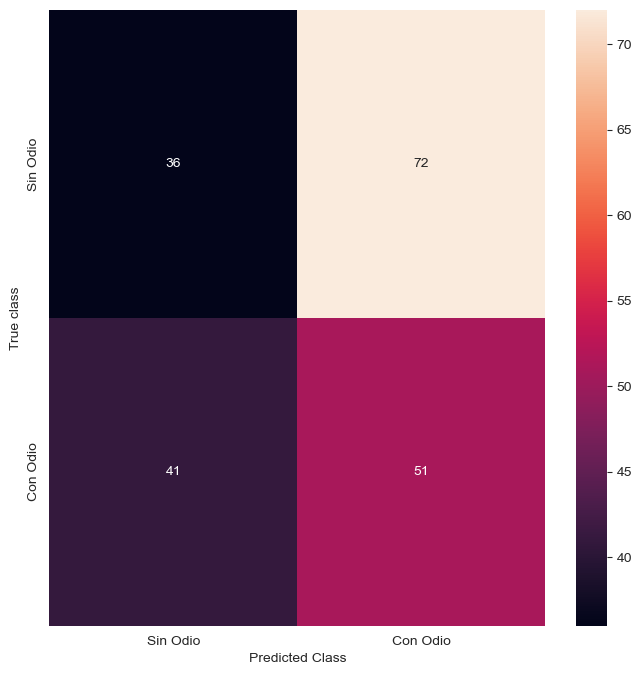

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.47      0.33      0.39       108
           1       0.41      0.55      0.47        92

    accuracy                           0.43       200
   macro avg       0.44      0.44      0.43       200
weighted avg       0.44      0.43      0.43       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.33      0.40       430
           1       0.46      0.66      0.54       370

    accuracy                           0.48       800
   macro avg       0.49      0.49      0.47       800
weighted avg       0.50      0.48      0.47       800

-----------------------------------------------------


In [84]:
train_evaluate("KNN", KNeighborsClassifier)

SVM
-----------------------------------------------------
F1_score: 0.00 %
-----------------------------------------------------
Recall: 0.00 %
-----------------------------------------------------
ROC: 50.00 %
-----------------------------------------------------
Accuracy_test es: 54.00 %
-----------------------------------------------------
Accuracy_train es: 53.75 %
-----------------------------------------------------
Overfitting 0.46 % 
-----------------------------------------------------
Matriz de confusión:


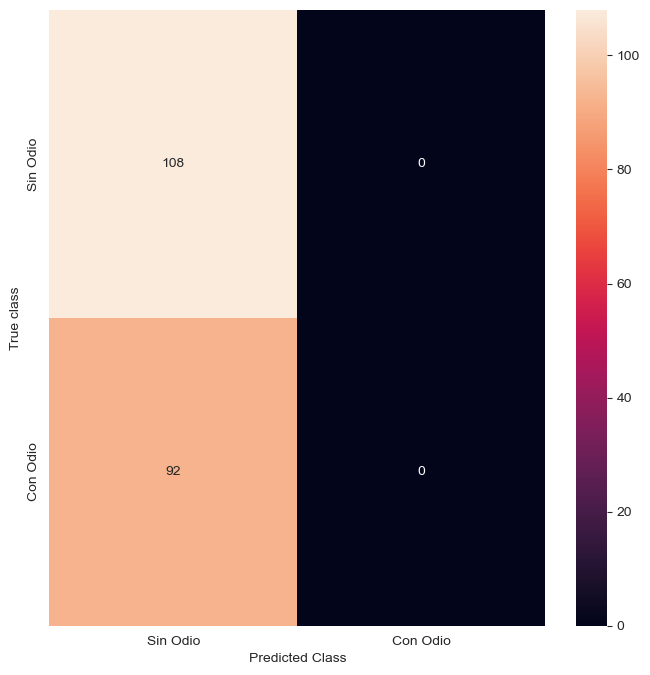

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       430
           1       0.00      0.00      0.00       370

    accuracy                           0.54       800
   macro avg       0.27      0.50      0.35       800
weighted avg       0.29      0.54      0.38       800

-----------------------------------------------------


/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [85]:
train_evaluate("SVM", SVC)

SGD Classifier
-----------------------------------------------------
F1_score: 0.00 %
-----------------------------------------------------
Recall: 0.00 %
-----------------------------------------------------
ROC: 50.00 %
-----------------------------------------------------
Accuracy_test es: 54.00 %
-----------------------------------------------------
Accuracy_train es: 53.75 %
-----------------------------------------------------
Overfitting 0.46 % 
-----------------------------------------------------
Matriz de confusión:


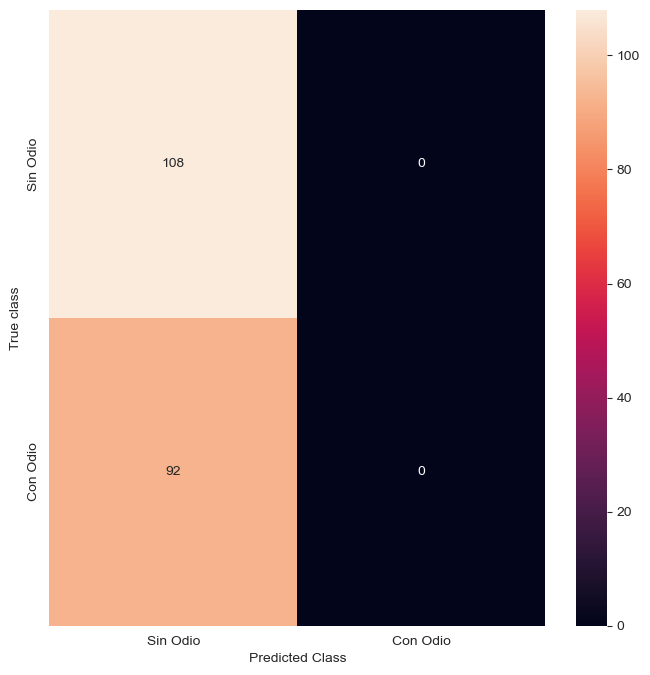

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       430
           1       0.00      0.00      0.00       370

    accuracy                           0.54       800
   macro avg       0.27      0.50      0.35       800
weighted avg       0.29      0.54      0.38       800

-----------------------------------------------------


/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [86]:
from sklearn.linear_model import SGDClassifier
train_evaluate("SGD Classifier", SGDClassifier)

Linear SVC
-----------------------------------------------------
F1_score: 0.00 %
-----------------------------------------------------
Recall: 0.00 %
-----------------------------------------------------
ROC: 50.00 %
-----------------------------------------------------
Accuracy_test es: 54.00 %
-----------------------------------------------------
Accuracy_train es: 53.75 %
-----------------------------------------------------
Overfitting 0.46 % 
-----------------------------------------------------
Matriz de confusión:


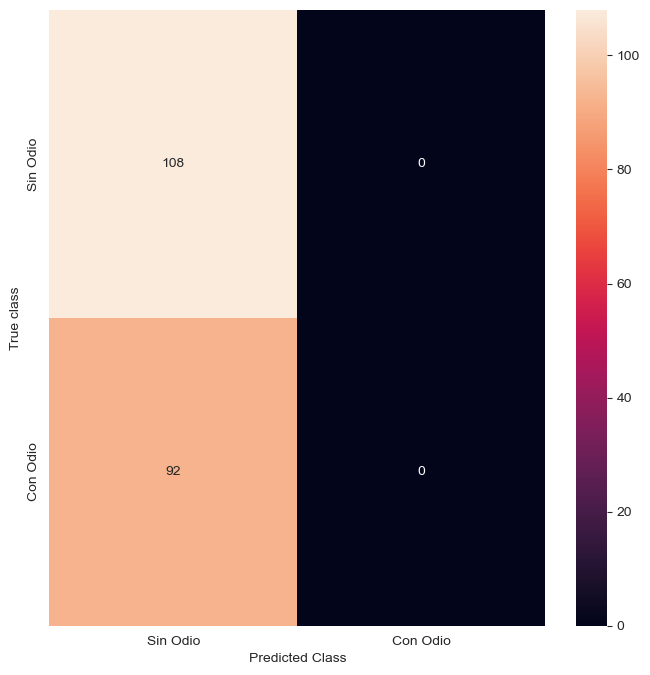

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       430
           1       0.00      0.00      0.00       370

    accuracy                           0.54       800
   macro avg       0.27      0.50      0.35       800
weighted avg       0.29      0.54      0.38       800

-----------------------------------------------------


/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephanievalderramacarmona/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [87]:
from sklearn.svm import LinearSVC
train_evaluate("Linear SVC", LinearSVC)

# Algoritmos Ensamble
* ###  GradientBoost ---> GradientBoostClassifier
* ###  Ramdom Forest ---> Ramdom ForestClassifier
* ###  AdaBoost ---> AdaBoostClassifier
* ###  XgBoost ----> XgBoostClassifier
* ###  LgBoost--->LGBMClassifier(),
* ###  CatBoost--->CatBoostClassifier(verbose=False)

In [43]:
# Algoritmos de ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
import catboost
from catboost import CatBoostClassifier

In [216]:
#train_evaluate("Random Forest", RandomForestClassifier)
#train_evaluate("Gradient Boosting Regressor", GradientBoostingClassifier)
#train_evaluate("AdaBoost Classifier", AdaBoostClassifier)
#train_evaluate("XgBoost Classifier", XGBClassifier)
#train_evaluate("LightGBM Classifier", LGBMClassifier)
#train_evaluate("CatBoost Classifier", CatBoostClassifier)


Random Forest
-----------------------------------------------------
F1_score: 7.77 %
-----------------------------------------------------
Recall: 4.35 %
-----------------------------------------------------
ROC: 48.93 %
-----------------------------------------------------
Accuracy_test es: 52.50 %
-----------------------------------------------------
Accuracy_train es: 54.87 %
-----------------------------------------------------
Overfitting -4.52 % 
-----------------------------------------------------
Matriz de confusión:


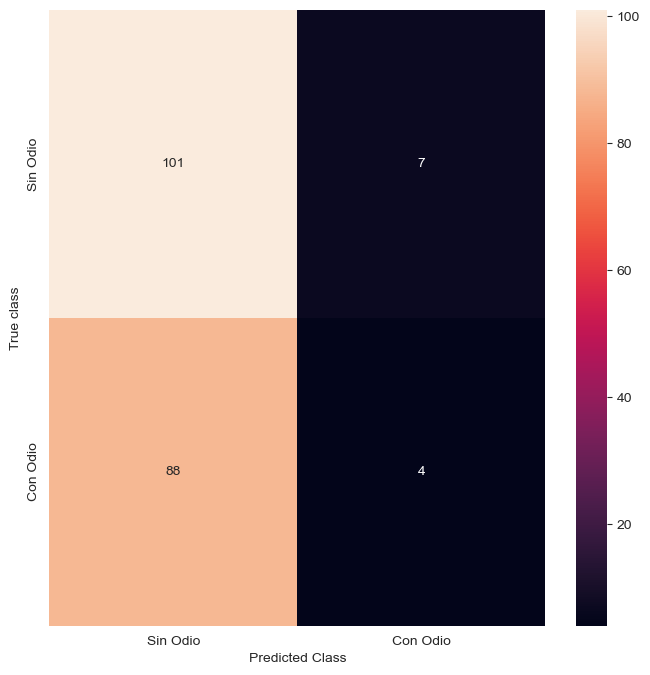

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.94      0.68       108
           1       0.36      0.04      0.08        92

    accuracy                           0.53       200
   macro avg       0.45      0.49      0.38       200
weighted avg       0.46      0.53      0.40       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.97      0.70       430
           1       0.63      0.06      0.11       370

    accuracy                           0.55       800
   macro avg       0.59      0.51      0.40       800
weighted avg       0.58      0.55      0.43       800

-----------------------------------------------------


In [88]:
train_evaluate("Random Forest", RandomForestClassifier)

Gradient Boosting Classifier
-----------------------------------------------------
F1_score: 7.77 %
-----------------------------------------------------
Recall: 4.35 %
-----------------------------------------------------
ROC: 48.93 %
-----------------------------------------------------
Accuracy_test es: 52.50 %
-----------------------------------------------------
Accuracy_train es: 54.87 %
-----------------------------------------------------
Overfitting -4.52 % 
-----------------------------------------------------
Matriz de confusión:


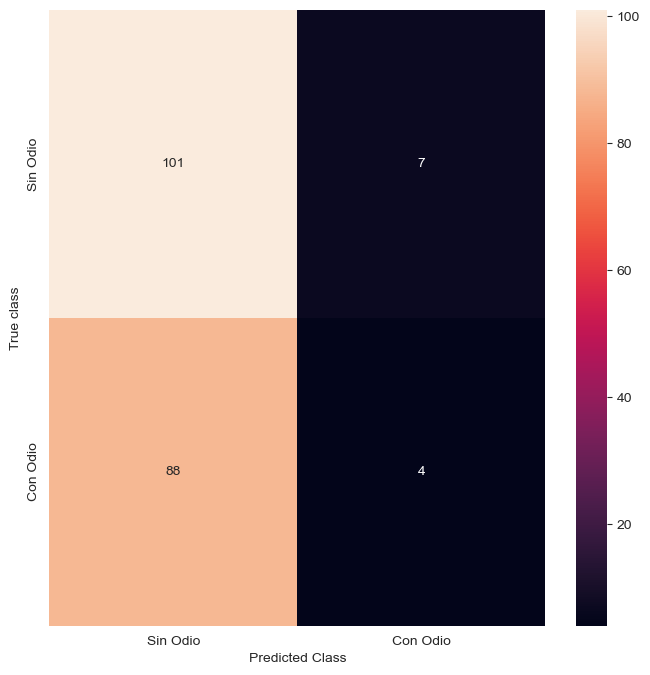

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.94      0.68       108
           1       0.36      0.04      0.08        92

    accuracy                           0.53       200
   macro avg       0.45      0.49      0.38       200
weighted avg       0.46      0.53      0.40       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.97      0.70       430
           1       0.63      0.06      0.11       370

    accuracy                           0.55       800
   macro avg       0.59      0.51      0.40       800
weighted avg       0.58      0.55      0.43       800

-----------------------------------------------------


In [89]:
train_evaluate("Gradient Boosting Classifier", GradientBoostingClassifier)

AdaBoost Regressor
-----------------------------------------------------
F1_score: 4.12 %
-----------------------------------------------------
Recall: 2.17 %
-----------------------------------------------------
ROC: 49.70 %
-----------------------------------------------------
Accuracy_test es: 53.50 %
-----------------------------------------------------
Accuracy_train es: 54.75 %
-----------------------------------------------------
Overfitting -2.34 % 
-----------------------------------------------------
Matriz de confusión:


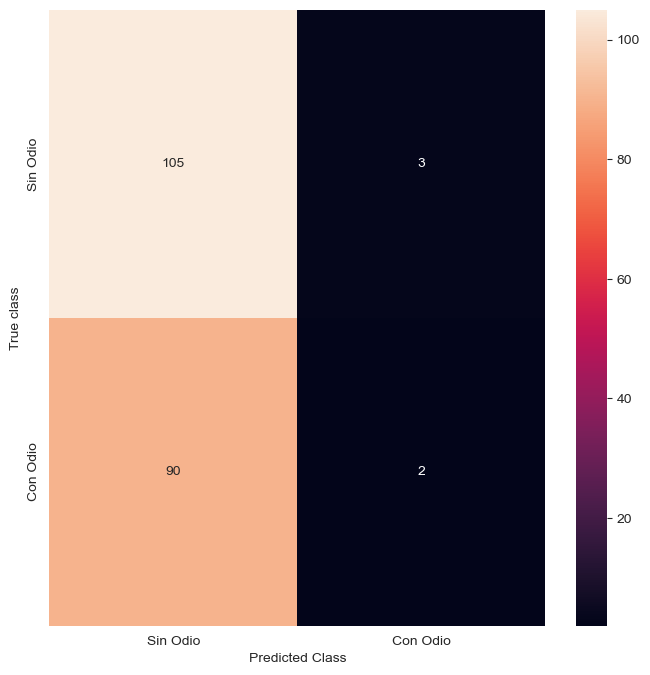

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.97      0.69       108
           1       0.40      0.02      0.04        92

    accuracy                           0.54       200
   macro avg       0.47      0.50      0.37       200
weighted avg       0.47      0.54      0.39       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.99      0.70       430
           1       0.79      0.03      0.06       370

    accuracy                           0.55       800
   macro avg       0.66      0.51      0.38       800
weighted avg       0.66      0.55      0.40       800

-----------------------------------------------------


In [90]:
train_evaluate("AdaBoost Regressor", AdaBoostClassifier)

Learning rate set to 0.009366
0:	learn: 0.6930698	total: 820us	remaining: 819ms
1:	learn: 0.6929787	total: 1.25ms	remaining: 622ms
2:	learn: 0.6929243	total: 1.56ms	remaining: 518ms
3:	learn: 0.6928635	total: 1.9ms	remaining: 472ms
4:	learn: 0.6927826	total: 2.34ms	remaining: 466ms
5:	learn: 0.6927283	total: 3.19ms	remaining: 528ms
6:	learn: 0.6926433	total: 3.76ms	remaining: 533ms
7:	learn: 0.6925693	total: 4.22ms	remaining: 523ms
8:	learn: 0.6924795	total: 4.7ms	remaining: 518ms
9:	learn: 0.6923882	total: 5.41ms	remaining: 536ms
10:	learn: 0.6923145	total: 6.87ms	remaining: 617ms
11:	learn: 0.6922060	total: 8.18ms	remaining: 673ms
12:	learn: 0.6921417	total: 8.85ms	remaining: 672ms
13:	learn: 0.6920101	total: 9.61ms	remaining: 677ms
14:	learn: 0.6918964	total: 10.9ms	remaining: 717ms
15:	learn: 0.6918477	total: 13ms	remaining: 801ms
16:	learn: 0.6917866	total: 14.6ms	remaining: 845ms
17:	learn: 0.6916449	total: 15.5ms	remaining: 845ms
18:	learn: 0.6915778	total: 16.4ms	remaining: 844

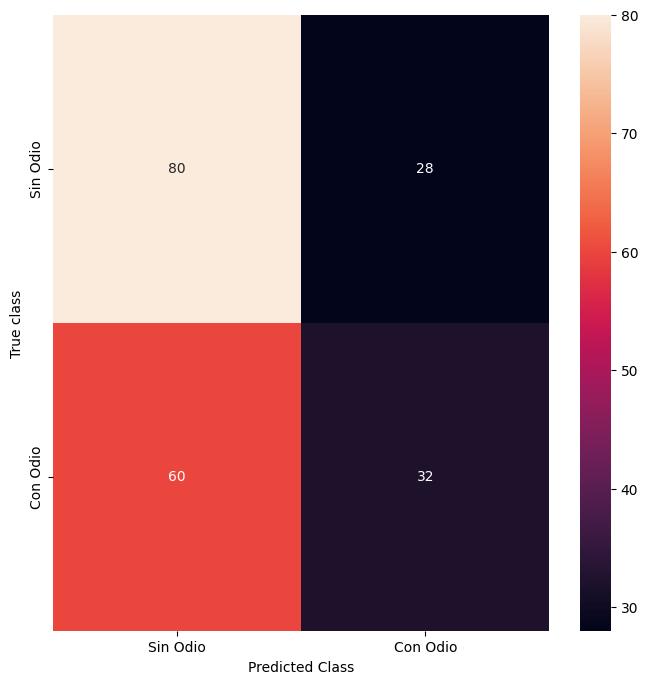

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.74      0.65       108
           1       0.53      0.35      0.42        92

    accuracy                           0.56       200
   macro avg       0.55      0.54      0.53       200
weighted avg       0.55      0.56      0.54       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.78      0.65       430
           1       0.52      0.28      0.36       370

    accuracy                           0.55       800
   macro avg       0.54      0.53      0.51       800
weighted avg       0.54      0.55      0.52       800

-----------------------------------------------------


In [48]:
train_evaluate("CatBoost Classifier", CatBoostClassifier)

XgBoost Classifier
-----------------------------------------------------
F1_score: 7.77 %
-----------------------------------------------------
Recall: 4.35 %
-----------------------------------------------------
ROC: 48.93 %
-----------------------------------------------------
Accuracy_test es: 52.50 %
-----------------------------------------------------
Accuracy_train es: 54.87 %
-----------------------------------------------------
Overfitting -4.52 % 
-----------------------------------------------------
Matriz de confusión:


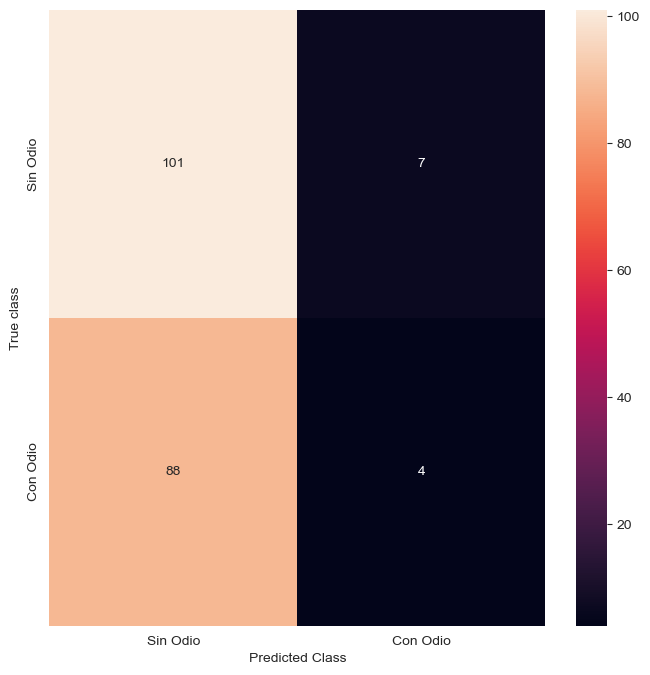

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.94      0.68       108
           1       0.36      0.04      0.08        92

    accuracy                           0.53       200
   macro avg       0.45      0.49      0.38       200
weighted avg       0.46      0.53      0.40       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.97      0.70       430
           1       0.64      0.06      0.10       370

    accuracy                           0.55       800
   macro avg       0.59      0.51      0.40       800
weighted avg       0.59      0.55      0.42       800

-----------------------------------------------------


In [92]:
train_evaluate("XgBoost Classifier", XGBClassifier)

LightGBM Classifier
-----------------------------------------------------
F1_score: 5.88 %
-----------------------------------------------------
Recall: 3.26 %
-----------------------------------------------------
ROC: 48.39 %
-----------------------------------------------------
Accuracy_test es: 52.00 %
-----------------------------------------------------
Accuracy_train es: 54.50 %
-----------------------------------------------------
Overfitting -4.81 % 
-----------------------------------------------------
Matriz de confusión:


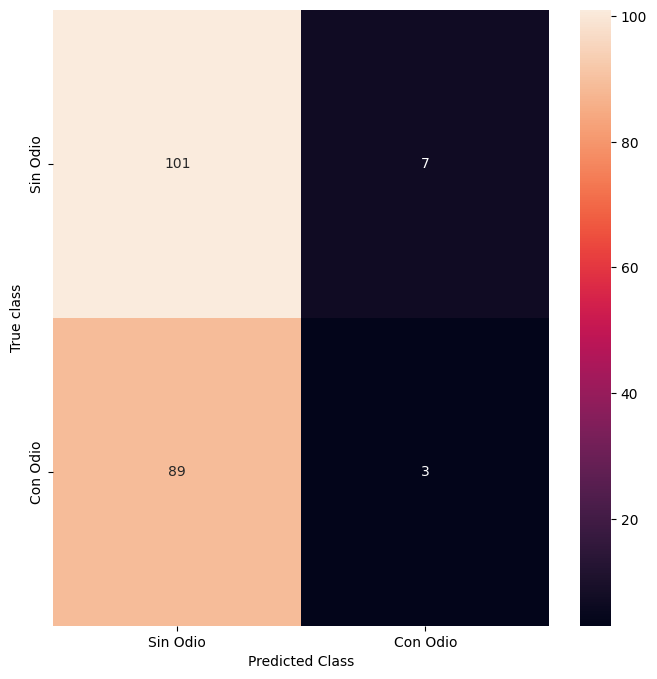

-----------------------------------------------------
Reporte de Clasificación (test)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.94      0.68       108
           1       0.30      0.03      0.06        92

    accuracy                           0.52       200
   macro avg       0.42      0.48      0.37       200
weighted avg       0.43      0.52      0.39       200

-----------------------------------------------------
Reporte de Clasificación (train)
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.97      0.70       430
           1       0.61      0.05      0.09       370

    accuracy                           0.55       800
   macro avg       0.57      0.51      0.39       800
weighted avg       0.57      0.55      0.41       800

-----------------------------------------------------


In [42]:
train_evaluate("LightGBM Classifier", LGBMClassifier)

In [49]:
#Guardamos el modelo con las mejores metricas de evaluación
modelo = CatBoostClassifier()
modelo_CBC = modelo.fit(X = X_train, y = y_train)

import joblib
joblib.dump(modelo_CBC, 'modelo_entrenado.pkl') # Guardo el modelo.

modelo_recuperado = joblib.load('modelo_entrenado.pkl') #cargamos el modelo guardado para su aplicacion 

Learning rate set to 0.009366
0:	learn: 0.6930698	total: 699us	remaining: 699ms
1:	learn: 0.6929787	total: 1.23ms	remaining: 614ms
2:	learn: 0.6929243	total: 1.56ms	remaining: 519ms
3:	learn: 0.6928635	total: 1.88ms	remaining: 469ms
4:	learn: 0.6927826	total: 2.47ms	remaining: 491ms
5:	learn: 0.6927283	total: 3.08ms	remaining: 510ms
6:	learn: 0.6926433	total: 3.77ms	remaining: 534ms
7:	learn: 0.6925693	total: 4.41ms	remaining: 547ms
8:	learn: 0.6924795	total: 4.82ms	remaining: 531ms
9:	learn: 0.6923882	total: 5.28ms	remaining: 523ms
10:	learn: 0.6923145	total: 5.8ms	remaining: 521ms
11:	learn: 0.6922060	total: 6.25ms	remaining: 515ms
12:	learn: 0.6921417	total: 6.61ms	remaining: 502ms
13:	learn: 0.6920101	total: 7.05ms	remaining: 496ms
14:	learn: 0.6918964	total: 7.87ms	remaining: 517ms
15:	learn: 0.6918477	total: 8.38ms	remaining: 515ms
16:	learn: 0.6917866	total: 8.95ms	remaining: 518ms
17:	learn: 0.6916449	total: 9.73ms	remaining: 531ms
18:	learn: 0.6915778	total: 10.5ms	remaining: 

In [50]:
modelo_recuperado